In [2]:
import pandas as pd
import numpy as np
from seaborn import pairplot
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [4]:
df=pd.read_csv('faults.csv')

In [5]:
# finding if any missing values
df.isnull().sum()

X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

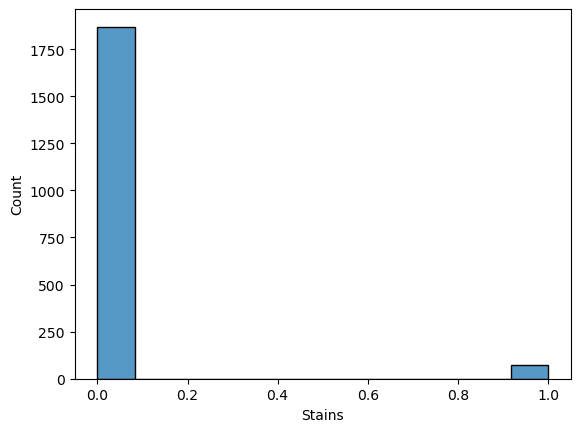

In [6]:
#Histogram- For univariate/Bivariate analysis

import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x='Stains', data=df, )
plt.show()

In [7]:
y=df.iloc[:,24].values
y.shape

(1941,)

In [8]:
X=df.iloc[:,0:24].values
X.shape

(1941, 24)

In [9]:
#Standardising the data
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X=SC.fit_transform(X)
X.shape

(1941, 24)

In [10]:
#Split the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [11]:
from sklearn.svm import SVR
regressor=SVR(kernel='linear')
regressor.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
from sklearn.metrics import mean_squared_error,r2_score
prediction=regressor.predict(X_test)
r2=r2_score(y_test,prediction)
rmse=mean_squared_error(y_test,prediction,squared=False)
print('R2 score is:',r2)
print('RMSE value is:',rmse)

R2 score is: 0.9705288965115672
RMSE value is: 0.08512318860323675


In [13]:
import pickle

In [14]:
pickle.dump(regressor,open('regmodel.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))